# ***Chalenge Project DIO - Machine Learning - November 2022***

```
Aplicação prática dos conceitos ministrados no treinamento de Machine Learning da Digital Innovation One.

Bootcamp: Geração Tech Unimed-BH - Data Science
Orientador: Prof. Dr. Renan
Aluno: Aiplbh - Argemiro Leite

Desenvolvimento  e aplicação do processe de aprendizado de imagens usando o modelo de 'transfer learning' .
```

# ***Projeto de Transfer Learning em Python***

```
Bootcamp Geração Tech Unimed-BH - Ciência de Dados
Desafio de projeto - Módulo: Machine Learning
Treinamento de redes neurais com Transfer Learning
Aluno: Argemiro Leite - Aiplbh
Orientação: Prof. Dr. Diego Renan
```

## ***Introdução***

O projeto consiste em aplicar o método de _Transfer Learning_ em uma rede de _Deep Learning_ na linguagem Python no ambiente COLAB.  

Para exemplo, utilizaremos o seguinte projeto que realiza Transfer Learning com o Dataset do MNIST: 

https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb 

O dataset utilizado engloba duas classes: gatos e cachorros. Uma descrição da base de dados pode ser visualizada neste link: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs. 

Já o dataset para download pode ser acessado por meio deste outro link:

https://www.microsoft.com/en-us/download/details.aspx?id=54765. 

## ***Referencial Teórico***


_***Transfer Learning***_ é um problema de pesquisa em aprendizado de máquina (ML) que se concentra em armazenar o conhecimento adquirido ao resolver um problema e aplicá-lo a um problema diferente, mas relacionado. Por exemplo, o conhecimento adquirido ao aprender a reconhecer carros pode ser aplicado ao tentar reconhecer caminhões. 

Do ponto de vista prático, reutilizar ou transferir informações de tarefas previamente aprendidas para o aprendizado de novas tarefas tem o potencial de melhorar significativamente a eficiência amostral de um agente de aprendizado por reforço.

Em um extremo, o aprendizado de transferência pode utilizar a rede pré-treinada, congelar os pesos e usar uma de suas camadas ocultas (geralmente a última) como um extrator de recursos, usando esses recursos como entrada para uma rede neural menor.

No outro extremo, começamos com a rede pré-treinada, mas permitimos que alguns dos pesos geralmente a última camada ou as últimas camadas) sejam modificados. 

Outro nome para este procedimento é chamado de "ajuste fino" porque estamos ajustando levemente os pesos da rede pré-treinada para a nova tarefa. 

Normalmente treinamos essa rede com uma taxa de aprendizado menor, pois esperamos que os recursos já sejam relativamente bons e não precisem ser muito alterados.

## ***Objetivo***

Realizar um _transfer learning_ em uma rede neural em Python.

## ***Insumos***

***Dataset***

O dataset utilizado engloba duas classes: 

- gatos.
- cachorros. 

Uma descrição da base de dados pode ser visualizada neste [link](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs)

O dataset para download pode ser acessado por meio deste outro link:

[https://www.microsoft.com/en-us/download/details.aspx?id=54765](https://www.microsoft.com/en-us/download/details.aspx?id=54765).

***Projeto de referência***

Para exemplo, utilizaremos o seguinte projeto de referência que realiza Transfer Learning com o Dataset do MNIST: 
https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb 


## ***Desenvolvimento***


Procedure
In this guide will go through the process of loading a state-of-the-art, 1000-class image classifier, VGG16 which won the ImageNet challenge in 2014, and using it as a fixed feature extractor to train a smaller custom classifier on our own images, although with very few code changes, you can try fine-tuning as well.

We will first load VGG16 and remove its final layer, the 1000-class softmax classification layer specific to ImageNet, and replace it with a new classification layer for the classes we are training over. We will then freeze all the weights in the network except the new ones connecting to the new classification layer, and then train the new classification layer over our new dataset.

We will also compare this method to training a small neural network from scratch on the new dataset, and as we shall see, it will dramatically improve our accuracy. We will do that part first.

As our test subject, we'll use a dataset consisting of around 6000 images belonging to 97 classes, and train an image classifier with around 80% accuracy on it. It's worth noting that this strategy scales well to image sets where you may have even just a couple hundred or less images. Its performance will be lesser from a small number of samples (depending on classes) as usual, but still impressive considering the usual constraints.

Esse projeto consistirá das seguintes fases:

1. Importação das bibliotecas
2. Obtenção da base de dados de imagens
3. Pré-processamento dos dados
4. Carregamento dos dados
5. Randomização
6. Criação, validação e teste do treinamento
7. Visualização dos dados treinados
8. Construção da rede neural conv2d
9. 

### ***1. Importação das bibliotecas***

In [62]:
%matplotlib inline

import os
import random
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf

from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

### ***2. Obtenção da base de dados de imagens***

O primeiro passo será carregar nossos dados. Vamos utilizar  a base de dados de da Kaggle, disponibilizado pelo link da Microsoft:

https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

Como trata-se de um arquivo compactado, usaremos o comando unzip para descompactá-lo. 

In [ ]:
# Obtendo o arquivo a partir do repositório da Microsoft
! wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

In [ ]:
# Visualizando o arquivo descompactado: kagglecatsanddogs_5340.zip
! ls -la

In [ ]:
# Decompactando o arquivo:
! unzip kagglecatsanddogs_5340.zip

In [ ]:
# Visualizando as pastas e arquivos criados após a descompactação: Pasta de intersse é a PetImages
! ls -la

Caso a descompactação tenha sido bem sucedida, serão criadas vários arquivos e alguns diretórios, entre os quais a pasta _PetImage_ que será nossa pasta base. 

Dentro desse pasta estão as subpastas Cats e Dogs onde encontram-se nossas imagens no formato jpg.

Agora já podemos deletar o arquivo ZIP baixado:

In [ ]:
!rm kagglecatsanddogs_5340.zip

Agora vamos reorganizar nossos dados da mesma maneira que foi usado no tutorial de referência com todas as imagens organizadas em subpastas, uma para cada classe.

Na verdade nossa pasta PetImages já está categorizada com as subpastas Cat e Dog, como podemos confirmar:

In [63]:
!ls PetImages/

Cat  Dog


A célula seguinte deve carregar a nossa base customizada corretamente. Para tanto substituiremos a variável ```root``` pelo nosso diretório base ```PetImage```. A ideia é criar uma 'lista' onde cada elemento é um _dict_ onde x é o dado e y é o label (um integer). 

Usaremos a função get_image(path) para carregar a imagem corretamente na matriz.
Observe, também, que as imagens estão sendo redimensionadas para o tamanho de 224x224. Essa transformação é necessária porque a entrada para o nosso classificador VGG16 é uma imagem RGB de 224x224. 

Essa operação será feita pelo código abaixo:

In [64]:
root = 'PetImages'

exclude = ['BACKGROUND_Google', 'Motorbikes', 'airplanes', 'Faces_easy', 'Faces']

train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]

categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

['PetImages/Dog', 'PetImages/Cat']


Função auxiliar para pre-processamento dos dados em uma imagem e um vetor de entrada.

In [51]:
len(categories)

2

In [65]:
# Função auxiliar para pre-processamento dos dados em uma imagem e um vetor de entrada.
def get_image(path):
    img = tf.keras.utils.load_img(path, target_size=(224, 224))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

Carga das imagens da pasta 'root' (PetImages)

In [54]:
# Na prática, foi necessário uma redução do número de imagens para não ultrapassar o limite de RAM do google collab.
#for i in range(201, 12500):
#  os.remove(f'PetImages/Cat/{i}.jpg')
#  os.remove(f'PetImages/Dog/{i}.jpg')

In [66]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# Contagem do número de classes
num_classes = len(categories)

Randomizando os dados:

In [67]:
random.shuffle(data)

Criação do particionamento dos dados que serão usados para treinamento / validação e teste (70%, 15%, 15%)

A divisão dos dados nessas três categorias - treinamento, validação e testes - tem a finalidade de avaliar a acurácia do nosso classificador (VGG16). 

Durante o treinamento, o otimizador usa o conjunto de validação para avaliar sua performance interna e determinar uma variação sem se sobreajustar ao conjunto de dados usados para treinamento. O conjunto de teste é sempre mantido fora do algoritmo de treinamento e é usado apenas no final para avaliar a precisão final do nosso modelo.

In [68]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

Separação dos dados para rótulos (eixo x e eixo y de cada parte dos dados de treino , validação e testes)

In [69]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]


O código a seguir garante que seja feito outro pré-processamento dos dados como anteriormente, certificando que os tipos sejam float32 e que estejam normalizados entre 0 e 1. 

In [70]:
# normalização dos dados
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# conversão dos rótulos em vetores
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(61, 2)


Fazendo um resumo do que realizamos até o momento, temos:


In [71]:
# sumário
print("Carregamento de %d imagens de %d categorias"%(len(data), num_classes))
print("Particionamento dos dados em Treino / Validação  / Teste: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("Tamanho dos dados de treino: ", x_train.shape)
print("Tamanho dos rótulos de treino: ", y_train.shape)


Carregamento de 402 imagens de 2 categorias
Particionamento dos dados em Treino / Validação  / Teste: 281, 60, 61
Tamanho dos dados de treino:  (281, 224, 224, 3)
Tamanho dos rótulos de treino:  (281, 2)


Vemos que as 402 imagens foram carregadas e separadas em duas categorias (Cat e Dog). Além disso elas foram separadas em três conjuntos de dados para ```treino```, ```validação``` e ```teste```.

O formato dos dados de treino é do tipo (n, 244, 244, 3) onde n indica o número de itens do conjunto de treinamento. 244, 244 indica o tamanho das imagens após feito o pré-processamento. 

O formato dos rótulos (labels) é do tipo (n, c) onde c é o número de classes encontradas (no caso apenas duas categorias: Cat e Dog).

O código a seguir permite verificar algumas imagens do nosso dataset:


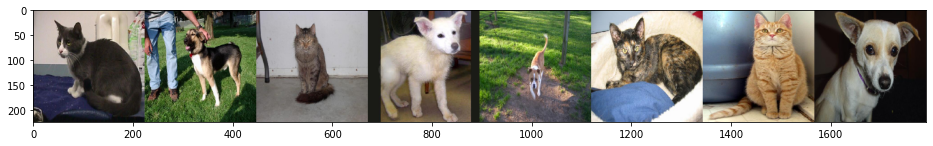

In [73]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [tf.keras.utils.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

### First training a neural net from scratch

Before doing the transfer learning, let's first build a neural network from scratch for doing classification on our dataset. This will give us a baseline to compare to our transfer-learned network later.

The network we will construct contains 4 alternating convolutional and max-pooling layers, followed by a [dropout](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) after every other conv/pooling pair. After the last pooling layer, we will attach a fully-connected layer with 256 neurons, another dropout layer, then finally a softmax classification layer for our classes.

Our loss function will be, as usual, categorical cross-entropy loss, and our learning algorithm will be [AdaDelta](https://arxiv.org/abs/1212.5701). Various things about this network can be changed to get better performance, perhaps using a larger network or a different optimizer will help, but for the purposes of this notebook, the goal is to just get an understanding of an approximate baseline for comparison's sake, and so it isn't neccessary to spend much time trying to optimize this network.

Upon compiling the network, let's run `model.summary()` to get a snapshot of its layers.

In [ ]:
# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
activation_25 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_26 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 54, 54,

We've created a medium-sized network with ~1.2 million weights and biases (the parameters). Most of them are leading into the one pre-softmax fully-connected layer "dense_5".

We can now go ahead and train our model for 100 epochs with a batch size of 128. We'll also record its history so we can plot the loss over time later. 

In [ ]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))


Train on 4346 samples, validate on 931 samples
Epoch 1/10
4346/4346 [==============================] - 11s 3ms/step - loss: 4.5153 - acc: 0.0403 - val_loss: 4.4140 - val_acc: 0.0763
Epoch 2/10
4346/4346 [==============================] - 10s 2ms/step - loss: 4.2447 - acc: 0.1010 - val_loss: 4.1066 - val_acc: 0.1407
Epoch 3/10
4346/4346 [==============================] - 10s 2ms/step - loss: 3.9434 - acc: 0.1519 - val_loss: 3.7939 - val_acc: 0.2052
Epoch 4/10
4346/4346 [==============================] - 10s 2ms/step - loss: 3.6178 - acc: 0.2046 - val_loss: 3.5077 - val_acc: 0.2309
Epoch 5/10
4346/4346 [==============================] - 10s 2ms/step - loss: 3.3217 - acc: 0.2531 - val_loss: 3.3025 - val_acc: 0.2696
Epoch 6/10
4346/4346 [==============================] - 10s 2ms/step - loss: 3.0783 - acc: 0.2931 - val_loss: 3.0644 - val_acc: 0.3083
Epoch 7/10
4346/4346 [==============================] - 10s 2ms/step - loss: 2.7861 - acc: 0.3502 - val_loss: 2.8714 - val_acc: 0.3373
Epoch 8/

Let's plot the validation loss and validation accuracy over time.

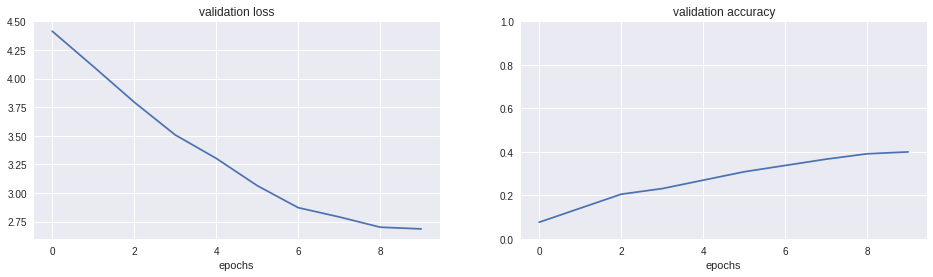

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_acc"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

Notice that the validation loss begins to actually rise after around 16 epochs, even though validation accuracy remains roughly between 40% and 50%. This suggests our model begins overfitting around then, and best performance would have been achieved if we had stopped early around then. Nevertheless, our accuracy would not have likely been above 50%, and probably lower down.

We can also get a final evaluation by running our model on the training set. Doing so, we get the following results:

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.6905115888865723
Test accuracy: 0.4034334763948498


Finally, we see that we have achieved a (top-1) accuracy of around 49%. That's not too bad for 6000 images, considering that if we were to use a naive strategy of taking random guesses, we would have only gotten around 1% accuracy. 

## Transfer learning by starting with existing network

Now we can move on to the main strategy for training an image classifier on our small dataset: by starting with a larger and already trained network.

To start, we will load the VGG16 from keras, which was trained on ImageNet and the weights saved online. If this is your first time loading VGG16, you'll need to wait a bit for the weights to download from the web. Once the network is loaded, we can again inspect the layers with the `summary()` method.

In [ ]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467904/553467096 [==============================] - 7s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_po

Notice that VGG16 is _much_ bigger than the network we constructed earlier. It contains 13 convolutional layers and two fully connected layers at the end, and has over 138 million parameters, around 100 times as many parameters than the network we made above. Like our first network, the majority of the parameters are stored in the connections leading into the first fully-connected layer.

VGG16 was made to solve ImageNet, and achieves a [8.8% top-5 error rate](https://github.com/jcjohnson/cnn-benchmarks), which means that 91.2% of test samples were classified correctly within the top 5 predictions for each image. It's top-1 accuracy--equivalent to the accuracy metric we've been using (that the top prediction is correct)--is 73%. This is especially impressive since there are not just 97, but 1000 classes, meaning that random guesses would get us only 0.1% accuracy.

In order to use this network for our task, we "remove" the final classification layer, the 1000-neuron softmax layer at the end, which corresponds to ImageNet, and instead replace it with a new softmax layer for our dataset, which contains 97 neurons in the case of the 101_ObjectCategories dataset. 

In terms of implementation, it's easier to simply create a copy of VGG from its input layer until the second to last layer, and then work with that, rather than modifying the VGG object directly. So technically we never "remove" anything, we just circumvent/ignore it. This can be done in the following way, by using the keras `Model` class to initialize a new model whose input layer is the same as VGG but whose output layer is our new softmax layer, called `new_classification_layer`. Note: although it appears we are duplicating this large network, internally Keras is actually just copying all the layers by reference, and thus we don't need to worry about overloading the memory.

In [ ]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)


We are going to retrain this network, `model_new` on the new dataset and labels. But first, we need to freeze the weights and biases in all the layers in the network, except our new one at the end, with the expectation that the features that were learned in VGG should still be fairly relevant to the new image classification task. Not optimal, but most likely better than what we can train to in our limited dataset. 

By setting the `trainable` flag in each layer false (except our new classification layer), we ensure all the weights and biases in those layers remain fixed, and we simply train the weights in the one layer at the end. In some cases, it is desirable to *not* freeze all the pre-classification layers. If your dataset has enough samples, and doesn't resemble ImageNet very much, it might be advantageous to fine-tune some of the VGG layers along with the new classifier, or possibly even all of them. To do this, you can change the below code to make more of the layers trainable.

In the case of CalTech-101, we will just do feature extraction, fearing that fine-tuning too much with this dataset may overfit. But maybe we are wrong? A good exercise would be to try out both, and compare the results.

So we go ahead and freeze the layers, and compile the new model with exactly the same optimizer and loss function as in our first network, for the sake of a fair comparison. We then run `summary` again to look at the network's architecture.

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Looking at the summary, we see the network is identical to the VGG model we instantiated earlier, except the last layer, formerly a 1000-neuron softmax, has been replaced by a new 97-neuron softmax. Additionally, we still have roughly 134 million weights, but now the vast majority of them are "non-trainable params" because we froze the layers they are contained in. We now only have 397,000 trainable parameters, which is actually only a quarter of the number of parameters needed to train the first model.

As before, we go ahead and train the new model, using the same hyperparameters (batch size and number of epochs) as before, along with the same optimization algorithm. We also keep track of its history as we go.

In [ ]:
history2 = model_new.fit(x_train, y_train, 
                         batch_size=128, 
                         epochs=10, 
                         validation_data=(x_val, y_val))


Train on 4346 samples, validate on 931 samples
Epoch 1/10
4346/4346 [==============================] - 66s 15ms/step - loss: 4.0574 - acc: 0.1631 - val_loss: 3.1996 - val_acc: 0.3040
Epoch 2/10
4346/4346 [==============================] - 46s 11ms/step - loss: 2.5812 - acc: 0.4441 - val_loss: 2.3154 - val_acc: 0.5070
Epoch 3/10
4346/4346 [==============================] - 46s 11ms/step - loss: 1.9747 - acc: 0.5630 - val_loss: 1.9155 - val_acc: 0.5585
Epoch 4/10
4346/4346 [==============================] - 46s 11ms/step - loss: 1.6366 - acc: 0.6305 - val_loss: 1.7621 - val_acc: 0.5768
Epoch 5/10
4346/4346 [==============================] - 46s 11ms/step - loss: 1.4263 - acc: 0.6795 - val_loss: 1.5046 - val_acc: 0.6681
Epoch 6/10
4346/4346 [==============================] - 46s 11ms/step - loss: 1.2610 - acc: 0.7098 - val_loss: 1.4539 - val_acc: 0.6477
Epoch 7/10
4346/4346 [==============================] - 46s 11ms/step - loss: 1.1283 - acc: 0.7407 - val_loss: 1.3778 - val_acc: 0.6778
E

Our validation accuracy hovers close to 80% towards the end, which is more than 30% improvement on the original network trained from scratch (meaning that we make the wrong prediction on 20% of samples, rather than 50%). 

It's worth noting also that this network actually trains _slightly faster_ than the original network, despite having more than 100 times as many parameters! This is because freezing the weights negates the need to backpropagate through all those layers, saving us on runtime.

Let's plot the validation loss and accuracy again, this time comparing the original model trained from scratch (in blue) and the new transfer-learned model in green.

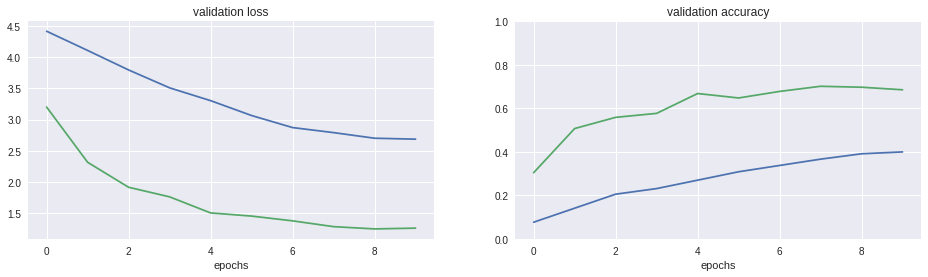

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_acc"])
ax2.plot(history2.history["val_acc"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

Notice that whereas the original model began overfitting around epoch 16, the new model continued to slowly decrease its loss over time, and likely would have improved its accuracy slightly with more iterations. The new model made it to roughly 80% top-1 accuracy (in the validation set) and continued to improve slowly through 100 epochs.

It's possibly we could have improved the original model with better regularization or more dropout, but we surely would not have made up the >30% improvement in accuracy. 

Again, we do a final validation on the test set.

In [ ]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.1540323304004423
Test accuracy: 0.7156652360515021


To predict a new image, simply run the following code to get the probabilities for each class.

In [ ]:
img, x = get_image('101_ObjectCategories/airplanes/image_0003.jpg')
probabilities = model_new.predict([x])


0.6425913


### Improving the results

78.2% top-1 accuracy on 97 classes, roughly evenly distributed, is a pretty good achievement. It is not quite as impressive as the original VGG16 which achieved 73% top-1 accuracy on 1000 classes. Nevertheless, it is much better than what we were able to achieve with our original network, and there is room for improvement. Some techniques which possibly could have improved our performance.

- Using data augementation: augmentation refers to using various modifications of the original training data, in the form of distortions, rotations, rescalings, lighting changes, etc to increase the size of the training set and create more tolerance for such distortions.
- Using a different optimizer, adding more regularization/dropout, and other hyperparameters.
- Training for longer (of course)

A more advanced example of transfer learning in Keras, involving augmentation for a small 2-class dataset, can be found in the [Keras blog](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html).

In [4]:
import os


# unzip kagglecatsanddogs_5340.zip

In [8]:
! unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [12]:
! ls -la

total 805612
drwxr-xr-x 1 root root      4096 Nov 24 00:32  .
drwxr-xr-x 1 root root      4096 Nov 24 00:01  ..
-rw-r--r-- 1 root root     24876 May  9  2022  CDLA-Permissive-2.0.pdf
drwxr-xr-x 4 root root      4096 Nov 22 00:13  .config
-rw-r--r-- 1 root root 824887076 May  9  2022  kagglecatsanddogs_5340.zip
drwxr-xr-x 4 root root      4096 Nov 24 00:32  PetImages
-rw-r--r-- 1 root root       104 Feb 10  2017 'readme[1].txt'
drwxr-xr-x 1 root root      4096 Nov 22 00:14  sample_data
